In [1]:
!pip install elevation
!pip install richdem
!pip install pysheds

     |████████████████████████████████| 71kB 3.4MB/s 
ERROR: pip-tools 4.5.1 has requirement click>=7, but you'll have click 6.7 which is incompatible.
  Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
     |████████████████████████████████| 4.5MB 6.0MB/s 
     |████████████████████████████████| 61kB 3.5MB/s 
     |████████████████████████████████| 6.5MB 6.6MB/s 
     |████████████████████████████████| 18.3MB 232kB/s 
  Created wheel for pysheds: filename=pysheds-0.2.7-cp36-none-any.whl size=51838 sha256=a30f643e37accf9d892e6e424fa5fa102fe1d792bf45886010733ba3fd8c7e57
  Stored in directory: /root/.cache/pip/wheels/e4/87/6f/f67cbfbc39ea2c76e0cb801c37590b9e3c47e9eee7baea2547
Successfully built pysheds


In [2]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import elevation
import richdem as rd

In [3]:
shasta_dem = rd.LoadGDAL('/content/drive/MyDrive/Geoinformatics/Project1/Dataset/Patna left.tif')

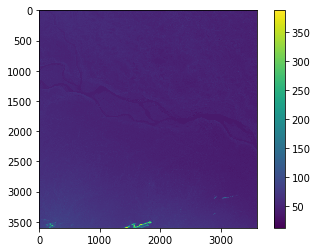

In [4]:
plt.imshow(shasta_dem, interpolation='none')
plt.colorbar()
plt.show()

Finding the SLOPE

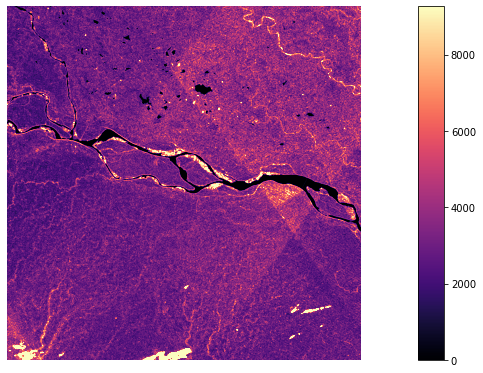

In [5]:
slope = rd.TerrainAttribute(shasta_dem, attrib='slope_riserun')
rd.rdShow(slope, axes=False, cmap='magma', figsize=(8, 5.5))
plt.show()

Findinf the Aspect

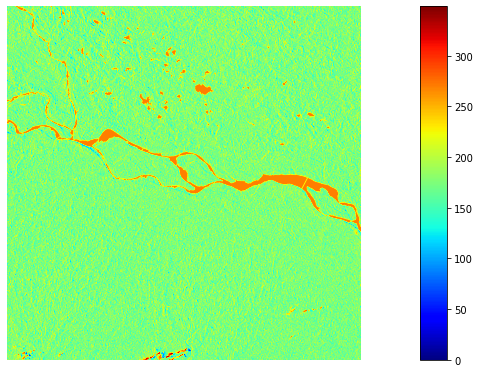

In [6]:
aspect = rd.TerrainAttribute(shasta_dem, attrib='aspect')
rd.rdShow(aspect, axes=False, cmap='jet', figsize=(8, 5.5))
plt.show()

Finding the Flow Accumulation.

/usr/local/lib/python3.6/dist-packages/richdem/__init__.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


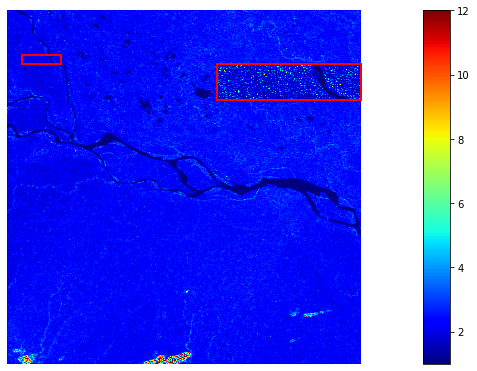

In [72]:
accum = rd.FlowAccumulation(shasta_dem , method='D8' , in_place=True)

d8_fig = rd.rdShow(accum, zxmin=150, zxmax=550, zymin=550, zymax=450, figsize=(8,5.5), axes=False, cmap='jet')

[  0. 255.]


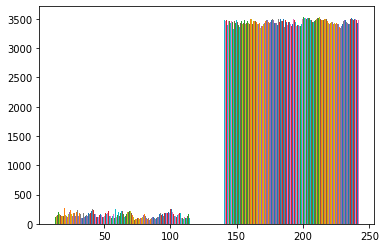

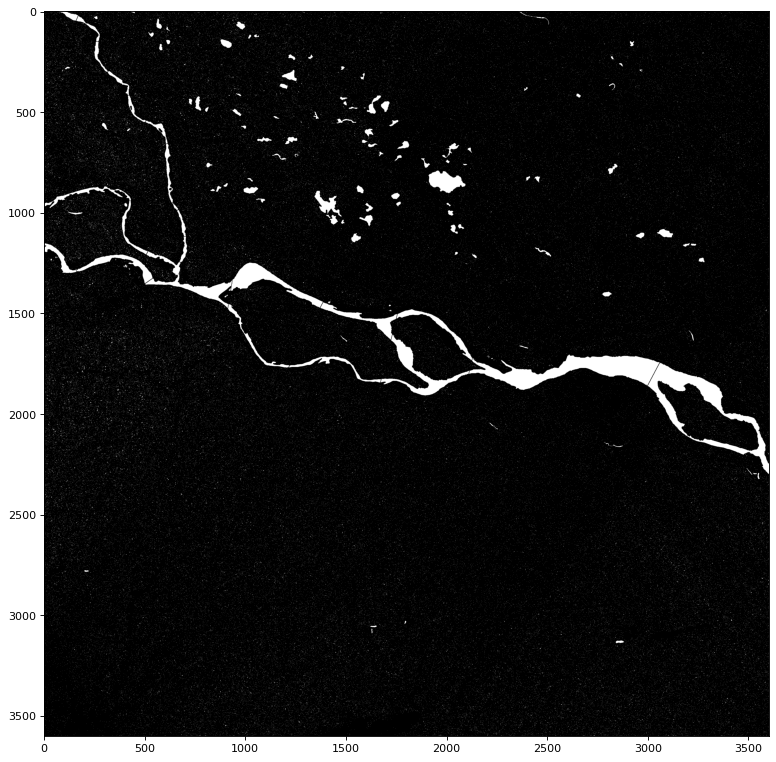

In [103]:
arr = np.array(slope)
for i, x in enumerate(arr):
  for j, y in enumerate(x):
    #print(arr[i][j])
    if y <15 :
      arr[i][j] = 0
    else:
      arr[i][j] = 255  
plt.hist(arr,bins=2)
print(np.unique(arr))
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(arr,cmap='binary')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


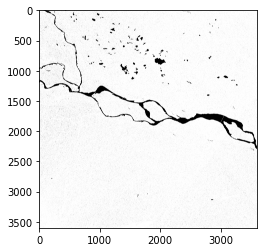

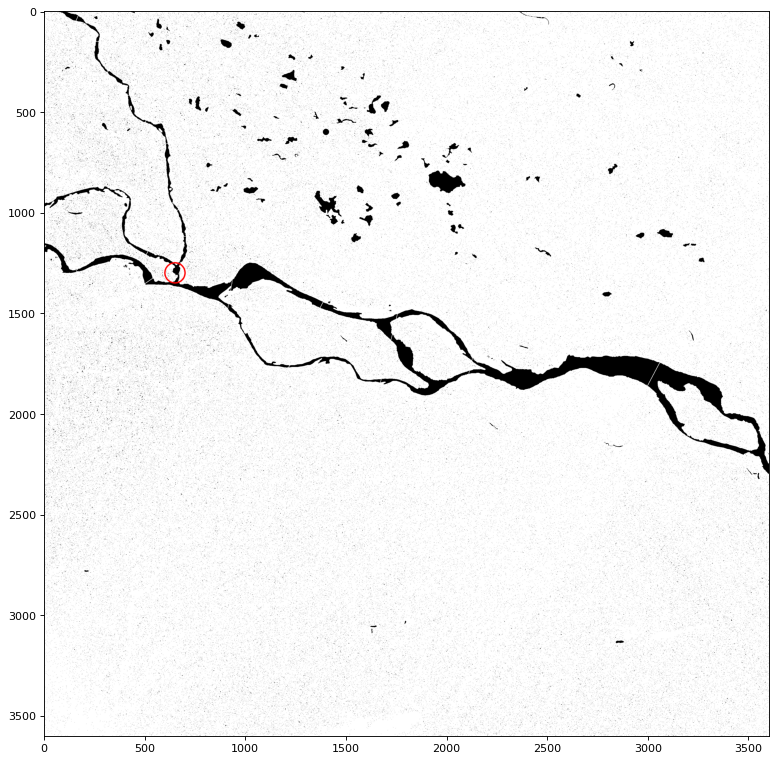

In [143]:
import cv2
colored_image = cv2.cvtColor(arr,cv2.COLOR_GRAY2RGB) 
plt.imshow(colored_image)
image = cv2.circle(colored_image, (650, 1300), radius=50, color=(255, 0, 0), thickness=5)
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(image)

In [149]:
arr = np.array(slope)
for i, x in enumerate(arr):
  for j, y in enumerate(x):
    #print(arr[i][j])
    if y <15 :
      arr[i][j] = 0
    else:
      arr[i][j] = 1
np.unique(arr)

array([0., 1.], dtype=float32)

In [158]:
np.unique

numpy.ndarray

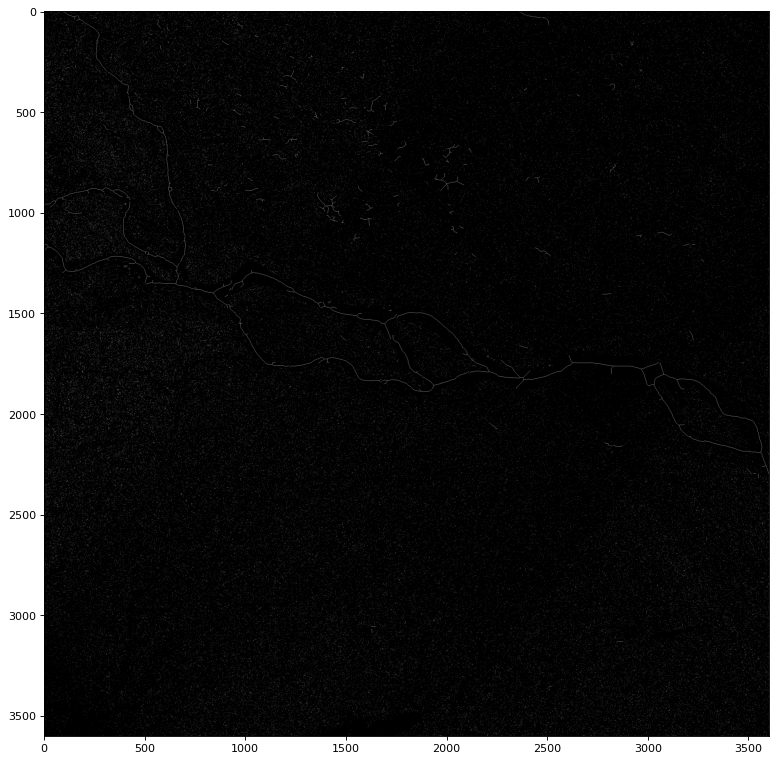

In [163]:
from skimage.morphology import skeletonize
from skimage.util import invert


image = invert(arr.copy())
skeleton = skeletonize(image.astype(int))
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(skeleton, cmap = 'gray')

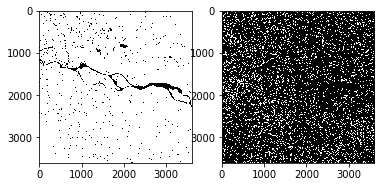

In [145]:
import matplotlib.pyplot as plt
from skimage import img_as_bool
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.morphology import skeletonize, binary_closing


im = img_as_bool(rgb2gray(image))
out = binary_closing(skeletonize(im))

f, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(im, cmap='gray', interpolation='nearest')
ax1.imshow(out, cmap='gray', interpolation='nearest')
plt.show()

In [146]:
print(im)

[[False False  True ...  True  True  True]
 [False  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


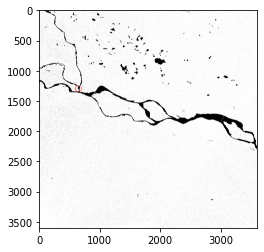

In [133]:
(thresh, blackAndWhiteImage) = cv2.threshold(image, 127, , cv2.THRESH_BINARY)
plt.imshow(blackAndWhiteImage)

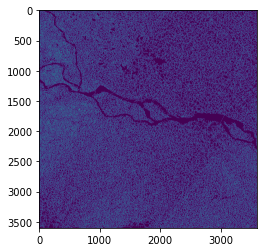

In [139]:
from skimage.morphology import skeletonize
img8 = (arr/255)
skeleton = skeletonize(img8)
plt.imshow(skeleton)

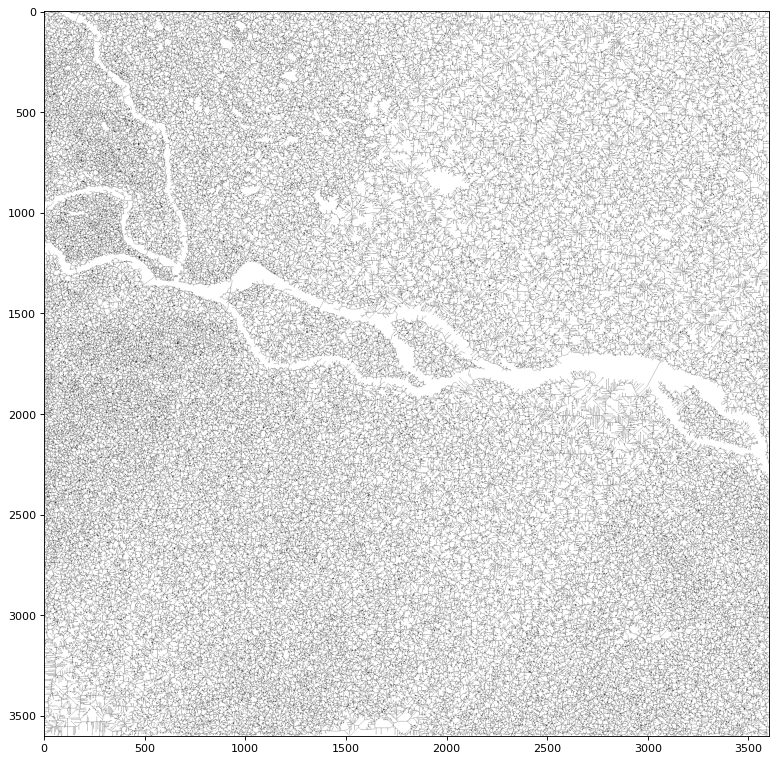

In [140]:
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(skeleton, cmap ='binary')

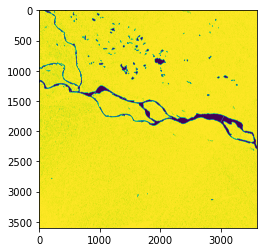

In [118]:
for i, row in enumerate(arr):
  for j, col in enumerate(row):
    if 

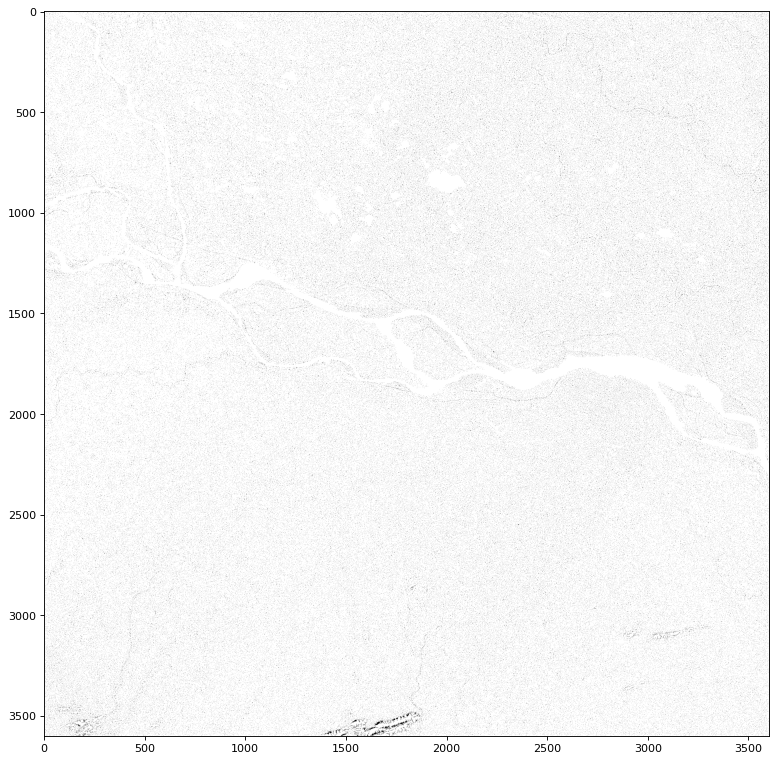

In [84]:
import cv2 as cv
img = np.array(arr, dtype = np.uint8)
r,threshold = cv.threshold(img,5 , 255,cv.THRESH_BINARY_INV)



In [78]:
accum[1]

rdarray([1., 1., 2., ..., 1., 1., 1.])

In [57]:
np.unique((np.array(accum)))
unique, counts = np.unique((np.array(accum)), return_counts=True)
dict(zip(unique, counts))

{1.0: 7792038,
 2.0: 2336531,
 3.0: 890161,
 4.0: 569138,
 5.0: 332052,
 6.0: 227235,
 7.0: 166284,
 8.0: 127096,
 9.0: 94122,
 10.0: 73770,
 11.0: 57956,
 12.0: 46826,
 13.0: 38151,
 14.0: 31115,
 15.0: 25839,
 16.0: 21286,
 17.0: 18087,
 18.0: 15154,
 19.0: 13132,
 20.0: 11116,
 21.0: 9768,
 22.0: 8339,
 23.0: 7343,
 24.0: 6318,
 25.0: 5630,
 26.0: 5004,
 27.0: 4334,
 28.0: 3809,
 29.0: 3341,
 30.0: 2888,
 31.0: 2640,
 32.0: 2310,
 33.0: 2048,
 34.0: 1763,
 35.0: 1565,
 36.0: 1329,
 37.0: 1232,
 38.0: 1117,
 39.0: 965,
 40.0: 874,
 41.0: 789,
 42.0: 685,
 43.0: 575,
 44.0: 563,
 45.0: 471,
 46.0: 426,
 47.0: 357,
 48.0: 335,
 49.0: 279,
 50.0: 251,
 51.0: 238,
 52.0: 190,
 53.0: 176,
 54.0: 143,
 55.0: 141,
 56.0: 115,
 57.0: 121,
 58.0: 95,
 59.0: 97,
 60.0: 88,
 61.0: 66,
 62.0: 64,
 63.0: 66,
 64.0: 57,
 65.0: 45,
 66.0: 43,
 67.0: 42,
 68.0: 53,
 69.0: 33,
 70.0: 39,
 71.0: 33,
 72.0: 37,
 73.0: 31,
 74.0: 26,
 75.0: 27,
 76.0: 19,
 77.0: 26,
 78.0: 16,
 79.0: 16,
 80.0: 18,
 81.

(array([[3601.,    0.,    0., ...,    0.,    0.,    0.],
        [3601.,    0.,    0., ...,    0.,    0.,    0.],
        [3601.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [3601.,    0.,    0., ...,    0.,    0.,    0.],
        [3601.,    0.,    0., ...,    0.,    0.,    0.],
        [3601.,    0.,    0., ...,    0.,    0.,    0.]]),
 array([  1. ,  72.8, 144.6, 216.4, 288.2, 360. , 431.8, 503.6, 575.4,
        647.2, 719. ]),
 <a list of 3601 Lists of Patches objects>)

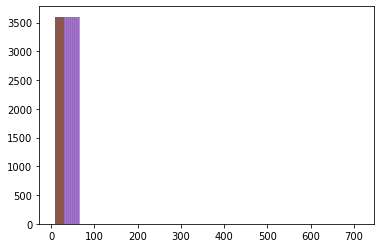

In [58]:
plt.hist(np.array(accum))

In [47]:
[(np.array(accum.ravel()).unique)].count()

AttributeError: ignored

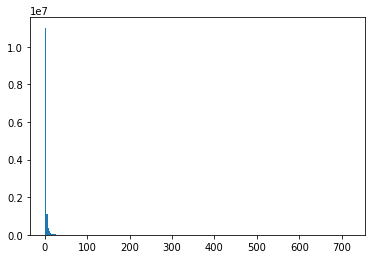

In [45]:
x=plt.hist(accum.flatten(), bins=256)

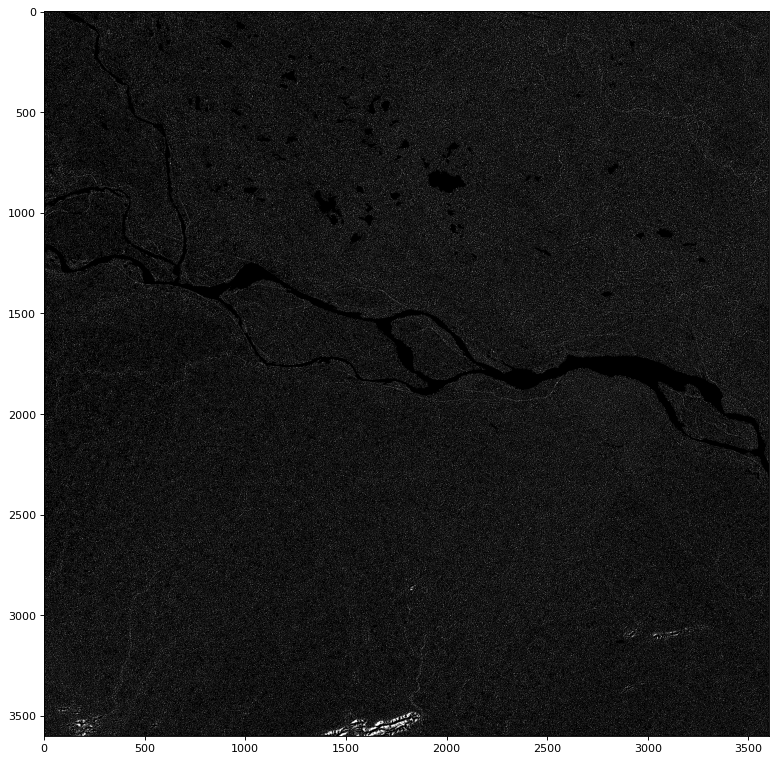

In [64]:
import cv2 as cv
img = np.array(accum, dtype = np.uint16)
r,threshold = cv.threshold(img,5 , 255,cv.THRESH_BINARY_INV)
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(threshold,cmap='binary')

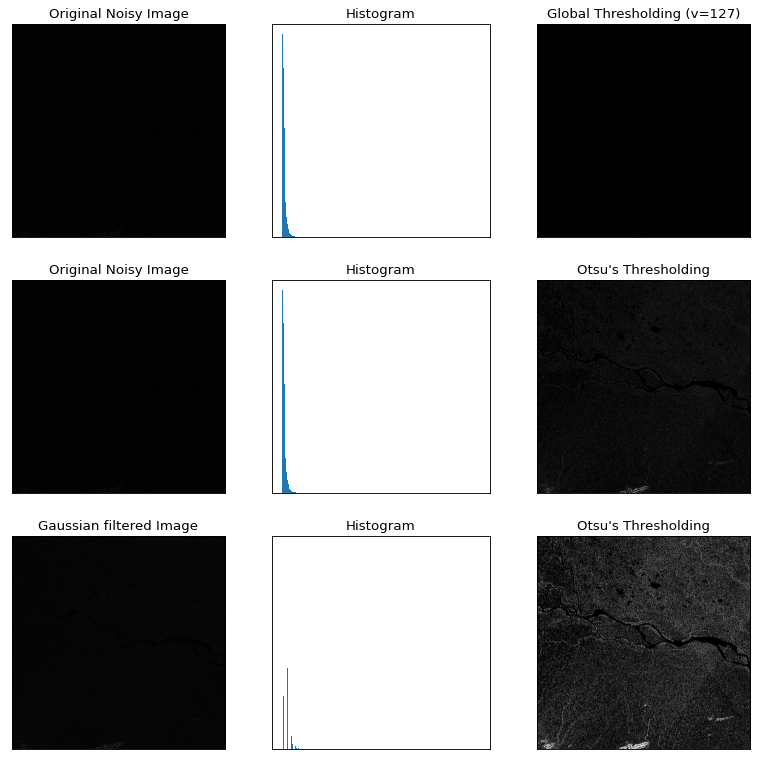

In [15]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

cv.imwrite('color_img.jpg', accum)
img = cv.imread('color_img.jpg',0)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [8]:
from osgeo import gdal
filename = "/content/Patna left.tif"
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(np.float)
data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

RuntimeError: ignored

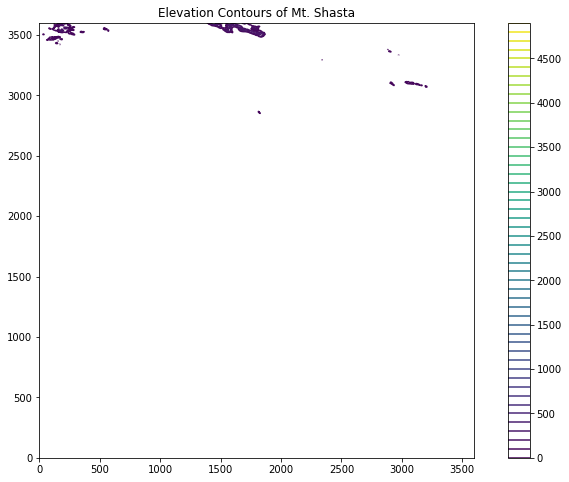

In [ ]:
#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contour(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 100)))
plt.title("Elevation Contours of Mt. Shasta")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

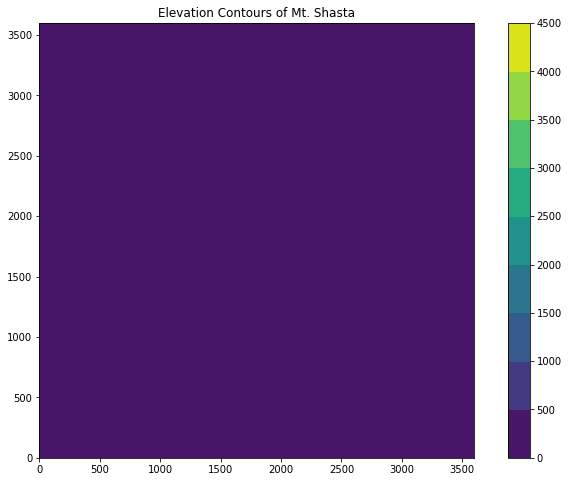

In [ ]:
#Plot our data with Matplotlib's 'contourf'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contourf(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 500)))
plt.title("Elevation Contours of Mt. Shasta")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
print(slope)

[[   0.      636.3961 3244.996  ... 2623.9285 4074.9233 2294.5588]
 [ 636.3961 1909.1884 2846.0498 ... 2846.0498 4846.6484 4633.0337]
 [1909.1884 1909.1884  900.     ... 3181.9805 4269.0747 3181.9805]
 ...
 [4024.9224 3181.9805 2700.     ... 2294.5588 1423.0249  900.    ]
 [4074.9233 2700.     3427.098  ... 3244.996  2545.5845 1909.1884]
 [1800.     2846.0498 4454.773  ... 2012.4612 1909.1884  636.3961]]
